In [360]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 100

In [361]:
import warnings
warnings.filterwarnings('ignore')

In [362]:
sns.set()


In [363]:
#Data_Marketing_Customer_Analysis_Round3.csv

weds_file= pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')
df=pd.DataFrame(weds_file)

In [364]:
result = df.dtypes
result


region                           object
customer_lifetime_value           int64
response                         object
coverage                         object
education                        object
effective_to_date                object
month                            object
employment_status                object
gender                           object
income                            int64
location_code                    object
marital_status                   object
monthly_premium_auto              int64
months_since_last_claim           int64
months_since_policy_inception     int64
number_of_open_complaints         int64
number_of_policies                int64
policy_type                      object
policy                           object
renew_offer_type                 object
sales_channel                    object
total_claim_amount                int64
vehicle_class                    object
vehicle_size                     object
dtype: object

In [380]:
category_list=list(df.select_dtypes(['object']).columns)
category_list



['region',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'month',
 'employment_status',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

In [366]:
numlist=list(df.select_dtypes(['int64']).columns)

In [367]:
numeric_df = df[[
 'customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']]

numeric_df



,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [368]:
lst=len(numeric_df.columns)
lst

8

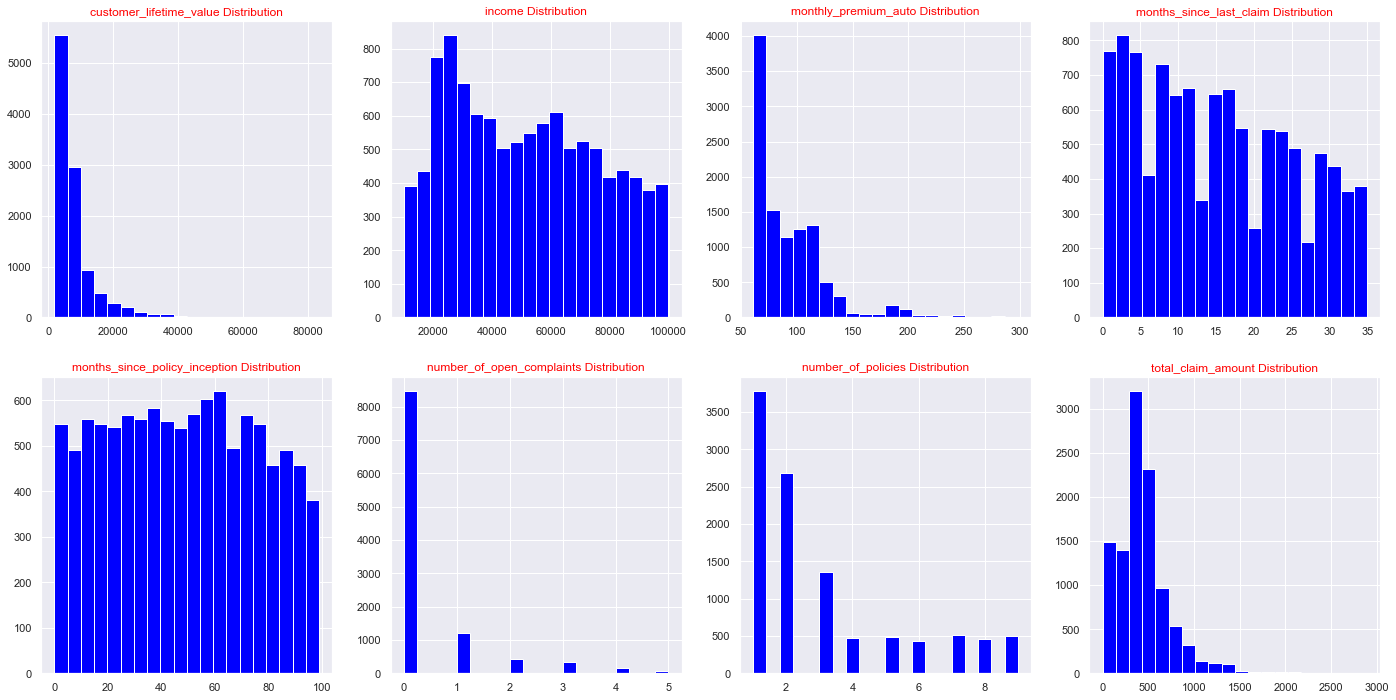

In [369]:
def histograms_plot(dataframe, features, rows, cols):

    
 fig=plt.figure(figsize=(24,12))

 for i, feature in enumerate(features):
        
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='blue')
        ax.set_title(feature+" Distribution",color='red')
        
fig.tight_layout()  
plt.show()

histograms_plot(numeric_df,numeric_df.columns,2,4)


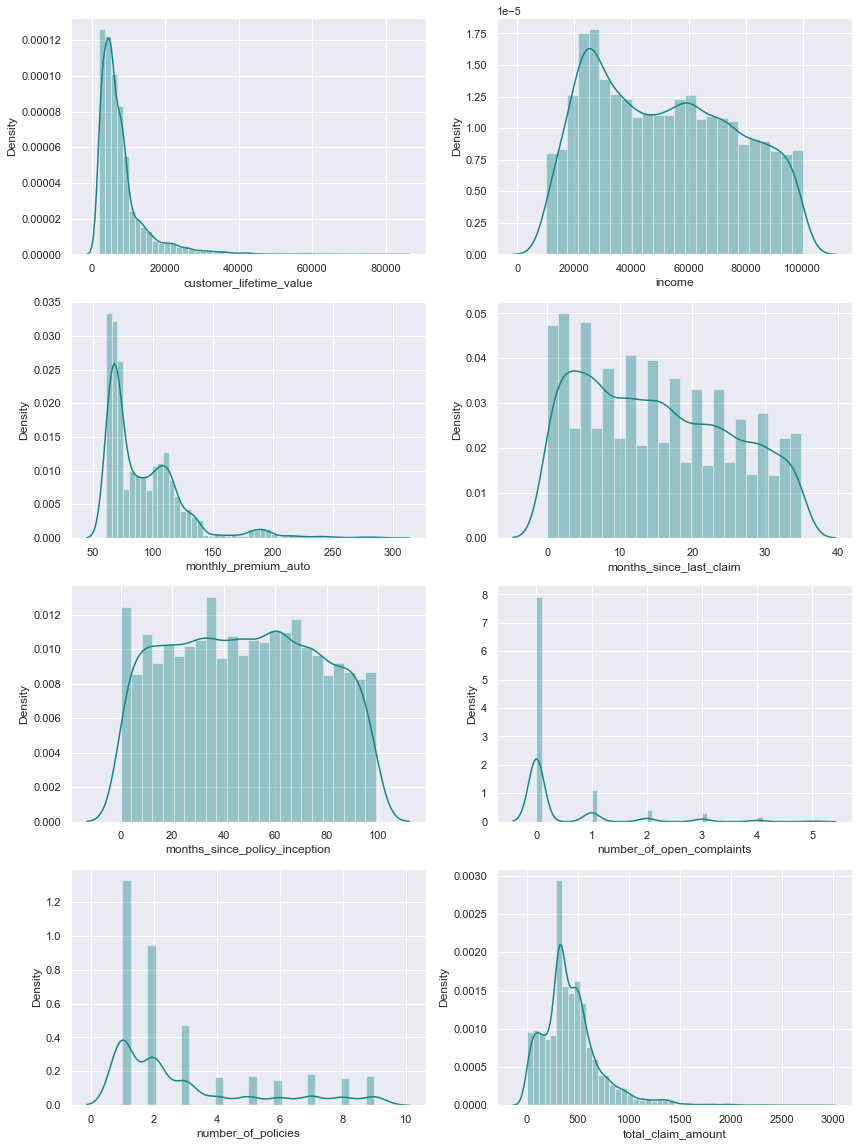

In [370]:

plt.subplots(figsize=(14, 20))

count=1
for i in numeric_df.columns:
    plt.subplot(4,2,count)
    sns.distplot(numeric_df[i],color='#158685')
    count+=1
        
plt.show()

 - Do the distributions for different numerical variables look like a normal distribution?
 
A normal distribution is an arrangement of a data set in which most values cluster in the middle of the range and the rest taper off symmetrically toward either extreme.

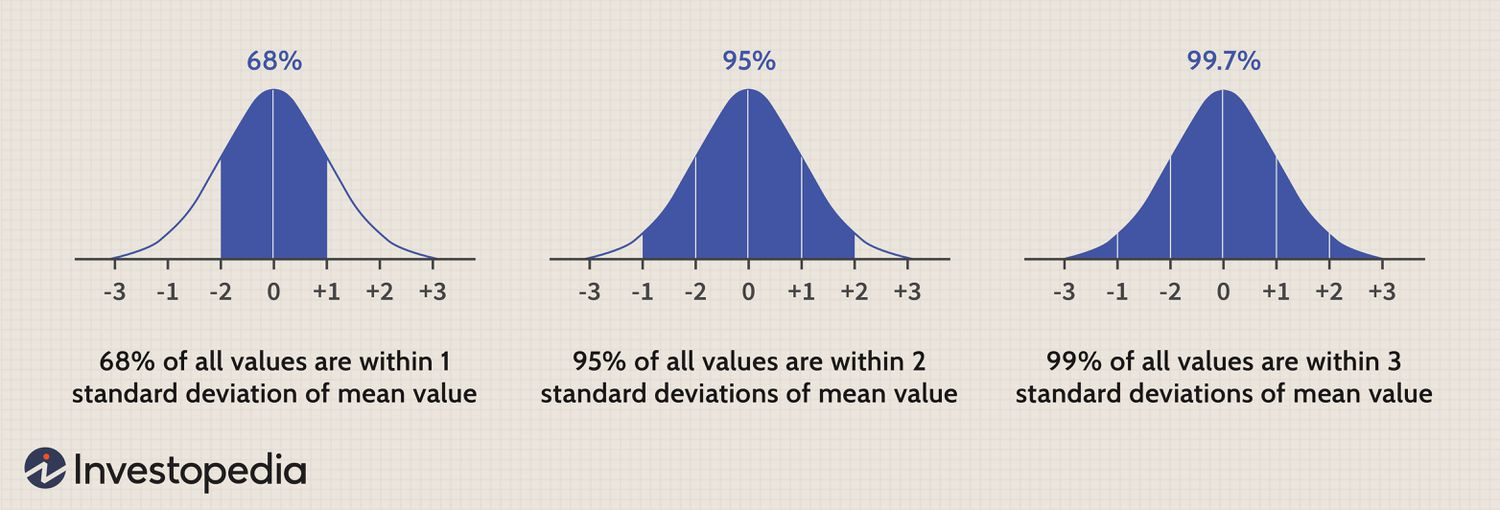]


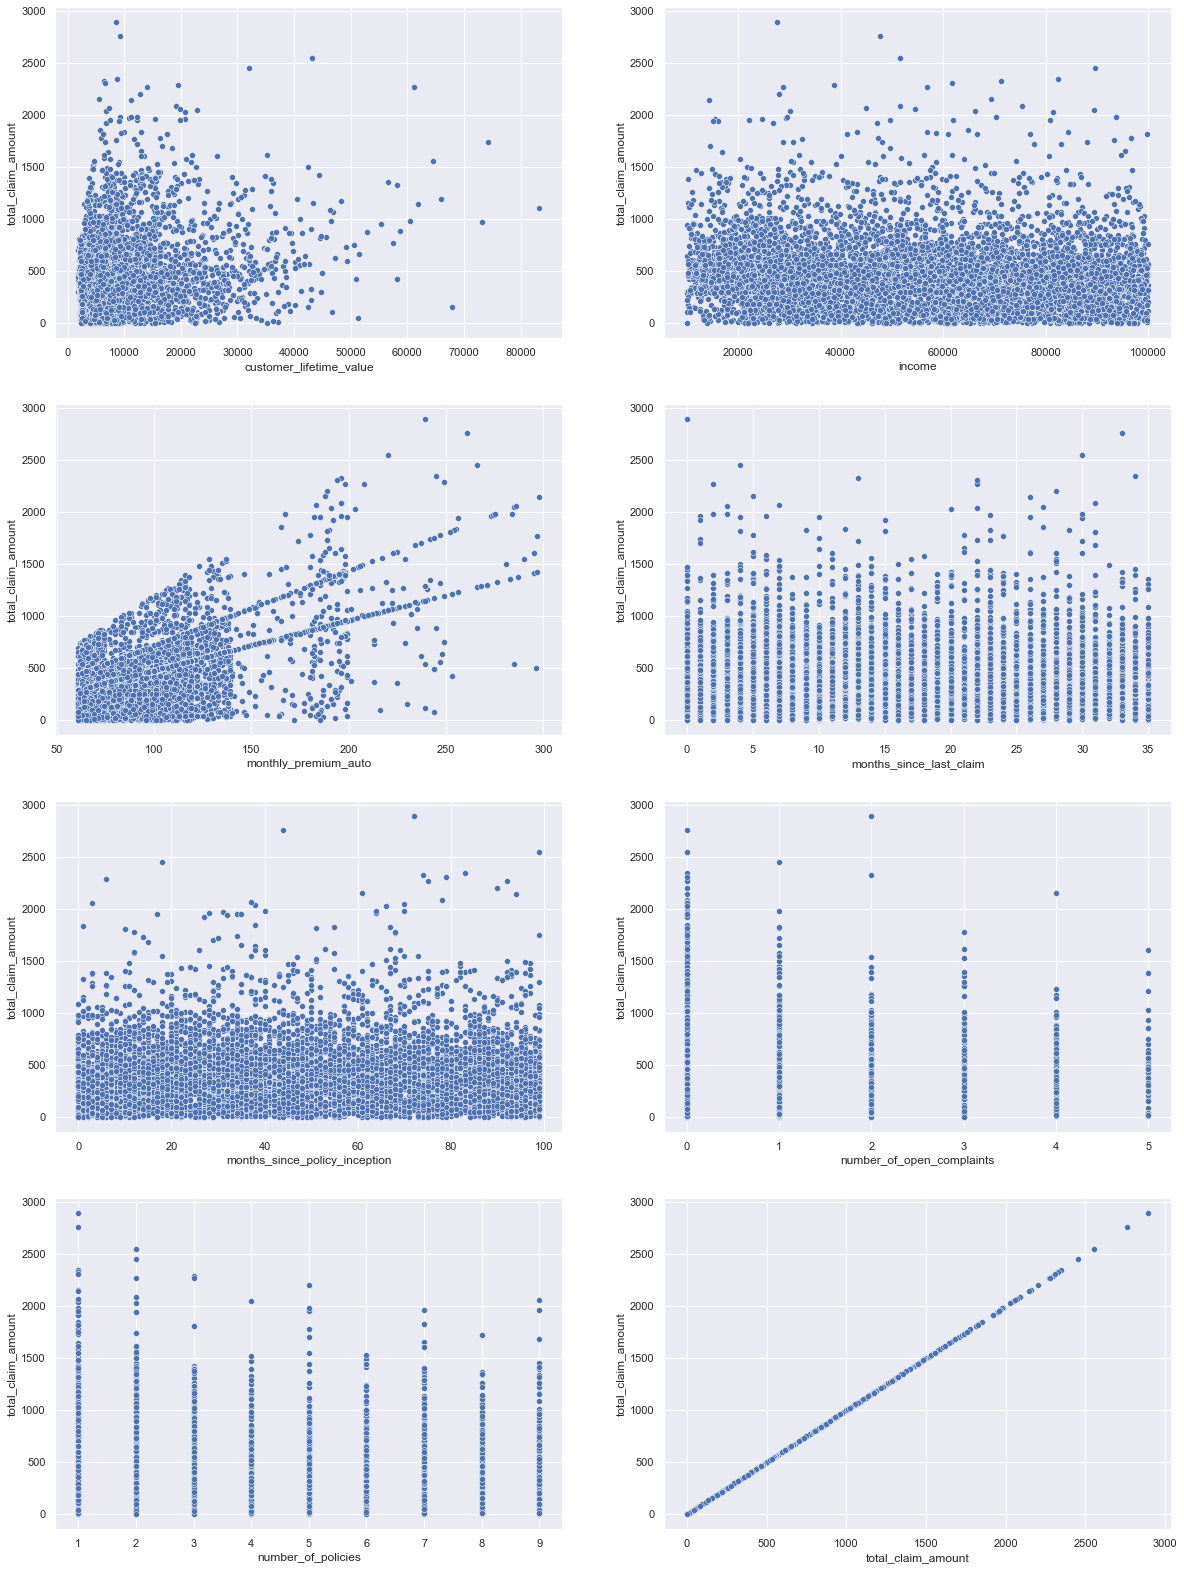

In [371]:
#scatter plot checking numerical variables with our target variable total claim amount
count=1
plt.subplots(figsize=(20, 28))

for i in numeric_df.columns:
    plt.subplot(4,2,count)
    sns.scatterplot(numeric_df[i],numeric_df["total_claim_amount"])
    count+=1

plt.show()



<AxesSubplot:>

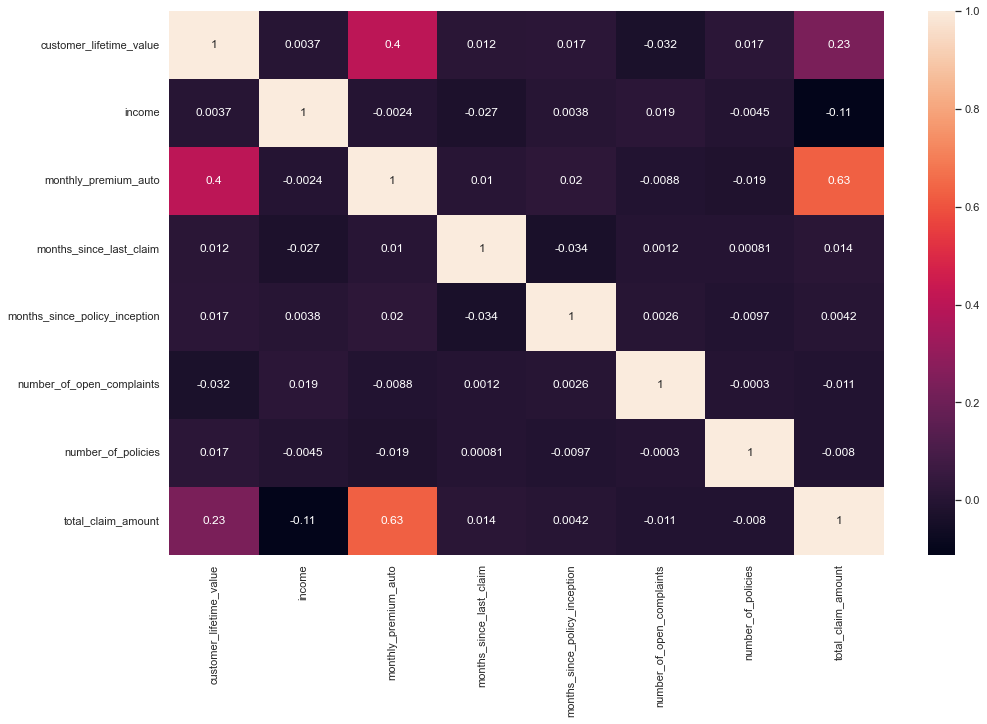

In [372]:
fig=plt.figure(figsize=(16,10))
sns.heatmap(numeric_df.corr(),annot=True)

In [373]:
numeric_df.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.003732,0.404235,0.011912,0.017055,-0.032371,0.016789,0.232849
income,0.003732,1.000000,-0.002431,-0.026564,0.003846,0.018903,-0.004461,-0.111221
monthly_premium_auto,0.404235,-0.002431,1.000000,0.010036,0.019696,-0.008811,-0.018805,0.630149
months_since_last_claim,0.011912,-0.026564,0.010036,1.000000,-0.034086,0.001204,0.000814,0.013874
months_since_policy_inception,0.017055,0.003846,0.019696,-0.034086,1.000000,0.002554,-0.009719,0.004186
number_of_open_complaints,-0.032371,0.018903,-0.008811,0.001204,0.002554,1.000000,-0.000303,-0.010668
number_of_policies,0.016789,-0.004461,-0.018805,0.000814,-0.009719,-0.000303,1.000000,-0.008019
total_claim_amount,0.232849,-0.111221,0.630149,0.013874,0.004186,-0.010668,-0.008019,1.000000


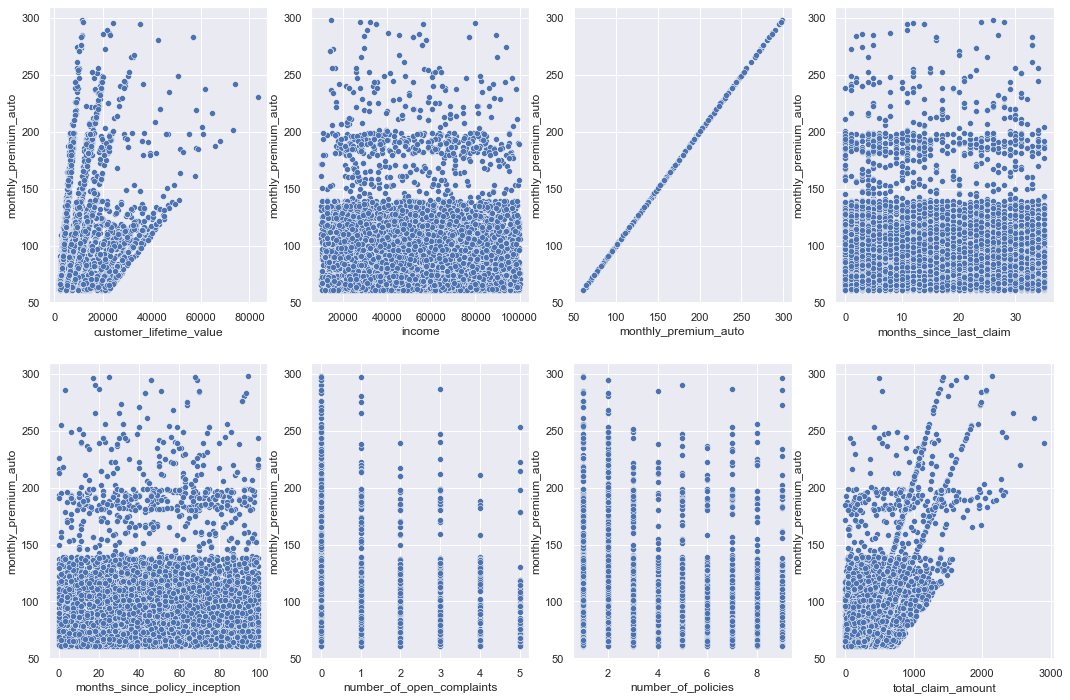

In [374]:
# our brief analysis is is clear that 'customer_lifetime_value', 'monthly_premium_auto' have the tightest correlations to our target vairiable, namely total claim amount
#this warrants further investigation of these 2 for exploratory research

plt.subplots(figsize=(18, 12))
count=1
for i in numeric_df.columns:
    plt.subplot(2,4,count)
    sns.scatterplot(numeric_df[i],numeric_df["monthly_premium_auto"])
    count+=1

plt.show()




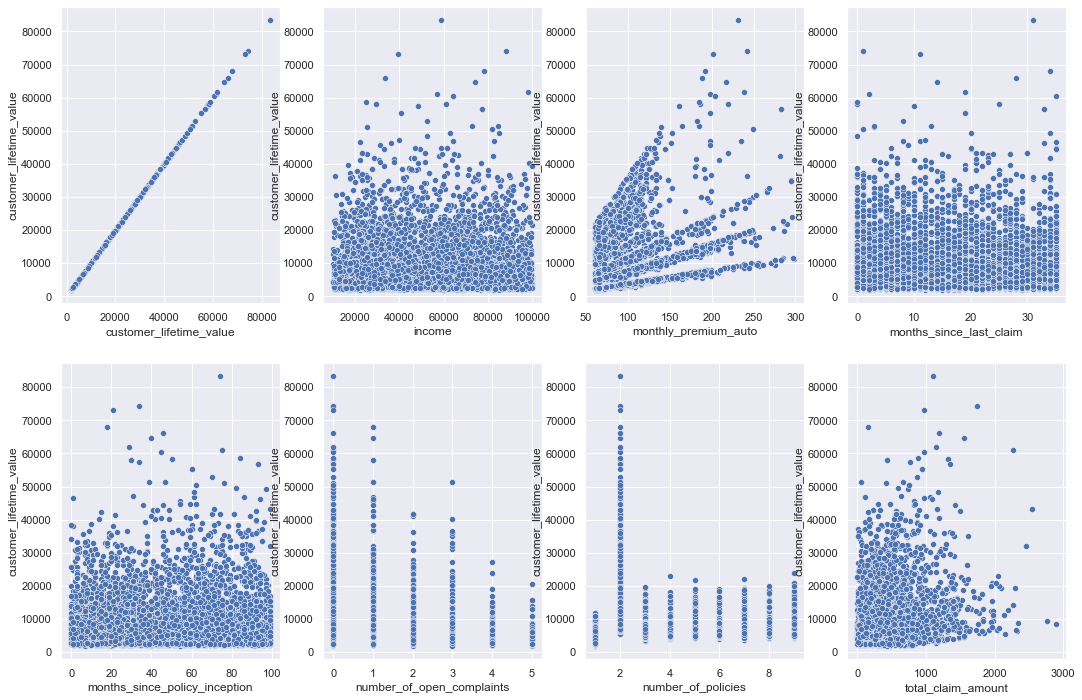

In [375]:
plt.subplots(figsize=(18, 12))
count=1
for i in numeric_df.columns:
    plt.subplot(2,4,count)
    sns.scatterplot(numeric_df[i],numeric_df["customer_lifetime_value"])
    count+=1

plt.show()


In [376]:
catagorical_df = df[[
 'region',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'month',
 'employment_status',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']]

catagorical_df



,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [394]:
cat_list=list(enumerate(category_list))






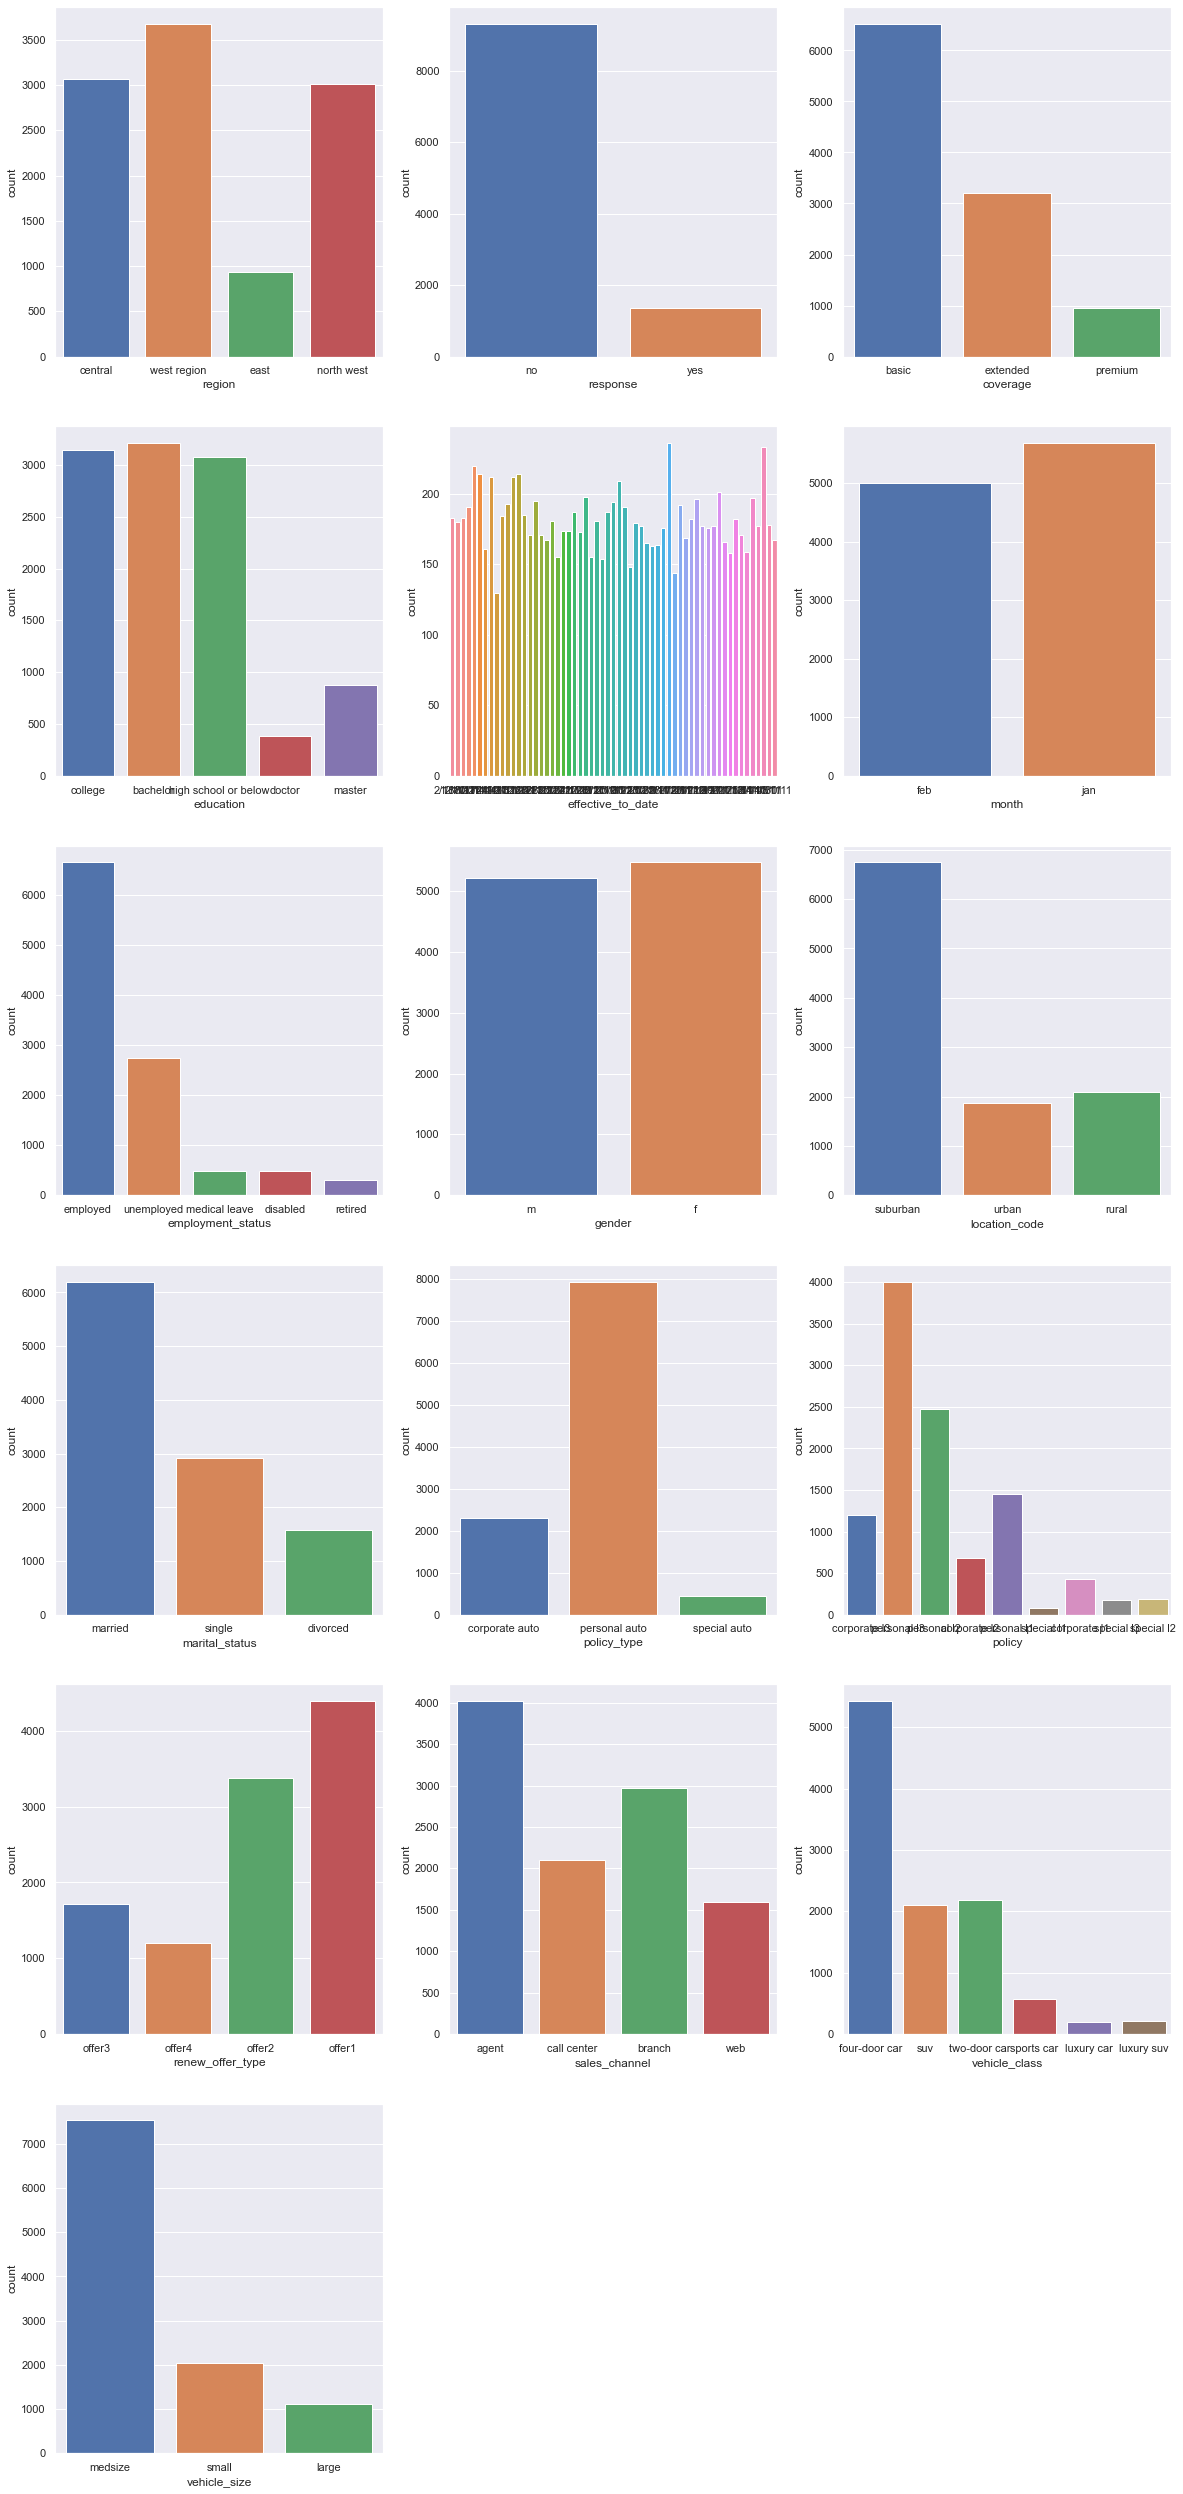

In [426]:
plt.subplots(figsize=(20, 45))
    
for i in cat_list:
    
    plt.subplot(6,3,i[0]+1)
    
    sns.countplot(i[1],data=catagorical_df,saturation=0.9)
    
    #plt.xticks(rotation=30)
    
fig.tight_layout(pad=20.0)


plt.show()


